# Life Expectancy and GDP

# **Introduction**

For this project, we will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between these two among six countries.

# **The goals of this project**

We seek answers for the following questions:

1. Has life expectancy increased over time in the six nations?
2. Has GDP increased over time in the six nations?
3. What is the average life expectancy in these nations?
4. Is there a correlation between GDP and life expectancy of a country?
5. Conclusions

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)



# Import Python Modules

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Loading the Data

We are loading the data stored in csv file into a DataFrame, which will allow us to conduct a more thorough data inspection.

For simplicity we will load all the information into a DataFrame called **df**. 

In [59]:
df = pd.read_csv('all_data.csv') # loading the data

In [60]:
df.head(10) #inspecting the first few rows of the data

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


# Exploring the Data

In [61]:
df.shape 

(96, 4)

In [62]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [63]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [64]:
df['Year'].unique() #period from 2000-2015

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [65]:
df['Country'].unique() # 6 countries

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

**After a quick inspection it is now visible that our data contains 4 columns and 94 rows. We can see the column titles and have a general overview of the numerical data.** 

**We now know that our data is containing information related to the period between 2000 - 2015 for 6 countries.** 

**From the the above we can also see that the column titles are inconsistent and while they are suitable for labeling the axis, it can cause difficulty in following the coding. Therefore, we will address this issue next.**

# Cleaning the Column Titles

In [66]:
df = df.rename(columns={"Country": "country", "Year": "year", 'Life expectancy at birth (years)': 'life_expectancy','GDP':'gdp'})

We are now able to use all lower case titles and a shortened phrase for the 'Life expectancy at birth (years)' column.

# Life Expectancy

In [67]:
life_exp_country= df.groupby('country').agg({'life_expectancy':['min','mean','max']}).round(0).reset_index()

life_exp_country

country life_expectancy            
                                        min  mean   max
0                     Chile            77.0  79.0  80.0
1                     China            72.0  74.0  76.0
2                   Germany            78.0  80.0  81.0
3                    Mexico            75.0  76.0  77.0
4  United States of America            77.0  78.0  79.0
5                  Zimbabwe            44.0  50.0  61.0

**The table above gives us an outline of the minimum, average and maximum life expectancy in years for each country. The numbers are fairly close to each other with the exception of Zimbabwe, where all these results are strikingly low.**


# 1. Has life expectancy increased over time in the six nations?

**We will create a lineplot to have a better overview on how the life expectancy changed over the years.**

Text(0, 0.5, 'Life expectancy at birth (years)')

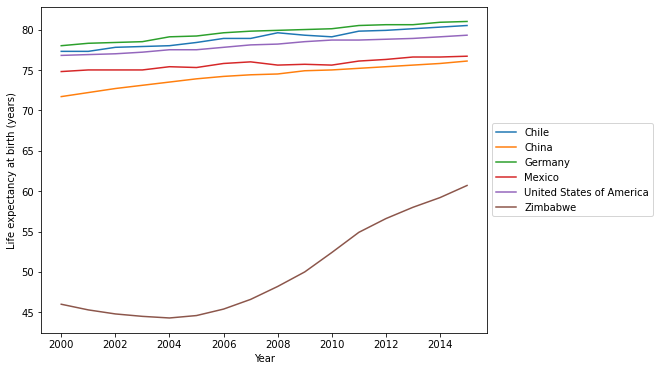

In [68]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.year, y=df.life_expectancy, hue=df.country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (years)')


**From the lineplot above we can clealry see that the answer to our question is definite, life expectancy has been increasing over the years in all the 6 countries with the highest increase in Zimbabwe.**

# 2. Has GDP increased over time in the six nations?

**Similar to before we will be creating a lineplot for better visualisation of how the GDP changed over the years.**

Text(0, 0.5, 'GDP')

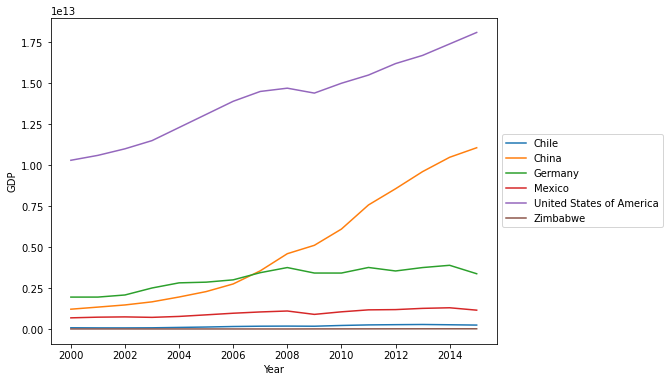

In [69]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df.year, y=df.gdp, hue=df.country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Year')
plt.ylabel('GDP in Trillions of U.S. Dollars')

**The line plot shows a huge increase of the GDP in the USA and China over the years. There is a more slower, steadier increase in Germany, Mexico and Chile. Zimbabwe seems to be the most behind among the 6 countries.**

**Below we will be reviewing how the GDP changed in each country individually.**

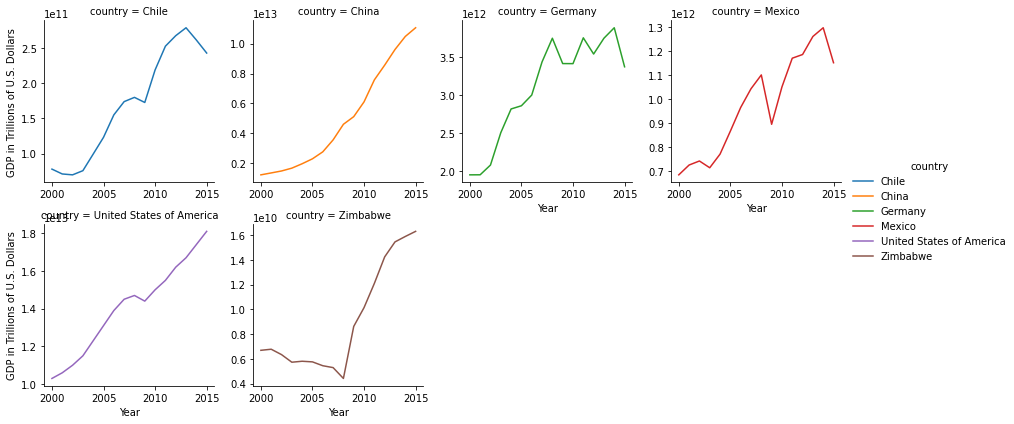

In [109]:
g = sns.FacetGrid(df, col='country', col_wrap=4,
                      hue = 'country', sharey = False, sharex = False)
g = (g.map(sns.lineplot,'year', 'gdp')
         .add_legend()
         .set_axis_labels('Year', 'GDP in Trillions of U.S. Dollars'));


**It is visible that in the given time period the GDP has been increasing in each country with occasional dips. We can also see that the GDP in Zimbabwe was actually decreasing between 2000 - 2008 and only started to increase afterwards.**

**The box plot below helps us visualising the range of increase of GDP in each country.**

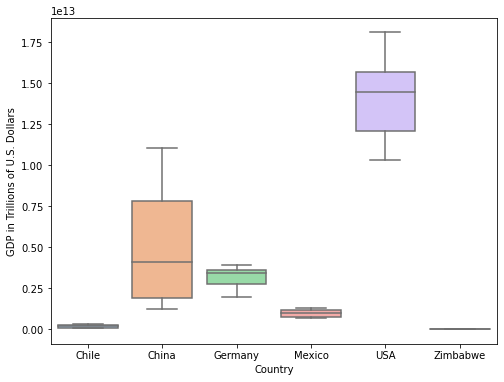

In [113]:
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.boxplot(x = "country", y = "gdp", palette = "pastel", data = df)
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe' ])
plt.xlabel('Country')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.show()

# 3. What is the average life expectancy in these nations?

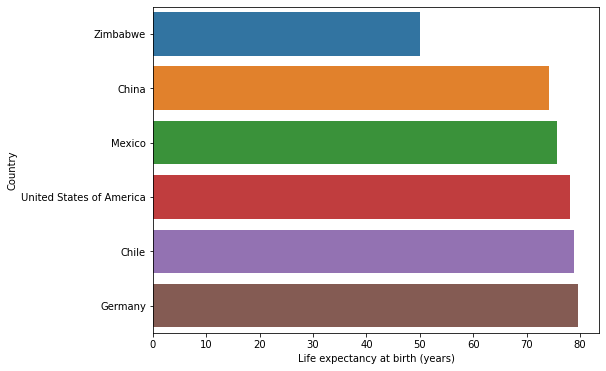

In [96]:
plt.figure(figsize=(8, 6))
sns.barplot(x='life_expectancy', y='country', data=df_means, order = df_means.sort_values('life_expectancy').country)
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Country')
plt.show()

**In this bar chart we can review the average life expectancy in each country, Zimbabwe falling significantly behind the rest, while Germany having the highest expected years.**

## 3.1 Box plots to visualize the range of life expectancy by country

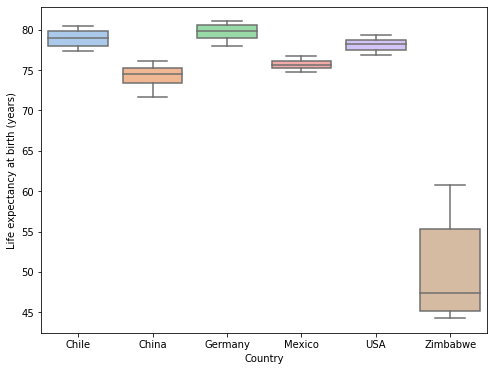

In [108]:
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.boxplot(x = "country", y = "life_expectancy", palette = "pastel", data = df)
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe' ])
plt.xlabel('Country')
plt.ylabel('Life expectancy at birth (years)')
plt.show()

**Based on the box plots above we can see that while Zimbabwe has the lowest life expectancy among the 6 nations, it actually has biggest improvement in the time period examined (going from 44 to 61 years).**

# 4. Is there a correlation between GDP and the life expectancy of a country?

First, let's filter our data to see how the average life expectancy stands against the average GDP by country. 

In [101]:
df_means = df.drop("year", axis = 1).groupby("country").mean().reset_index()
df_means['billion_dollar'] = '$' + (df_means['gdp'].astype(float)/1000000000).round(2).astype(str)

df_means.sort_values(by = 'gdp', ascending = False)

,country,life_expectancy,gdp,billion_dollar
4,United States of America,78.06250,1.407500e+13,$14075.0
1,China,74.26250,4.957714e+12,$4957.71
2,Germany,79.65625,3.094776e+12,$3094.78
3,Mexico,75.71875,9.766506e+11,$976.65
0,Chile,78.94375,1.697888e+11,$169.79
5,Zimbabwe,50.09375,9.062580e+09,$9.06


**We will create some scatter plots to better visualise the connection between GDP and life expectancy.**

## 4.1 Scatter plot examining the relationship between life expectancy and GDP

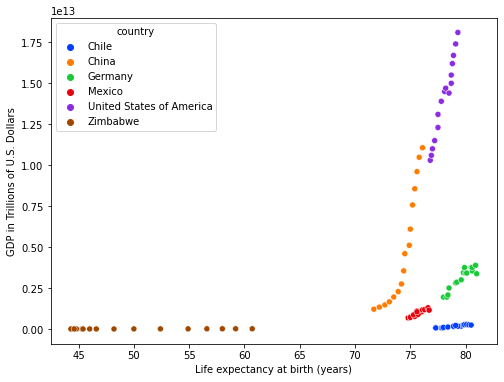

In [107]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'life_expectancy', y = 'gdp', hue = 'country', palette = 'bright', data = df)
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.xlabel('Life expectancy at birth (years)')
plt.show()

## 4.2 Individual scatter plots by country

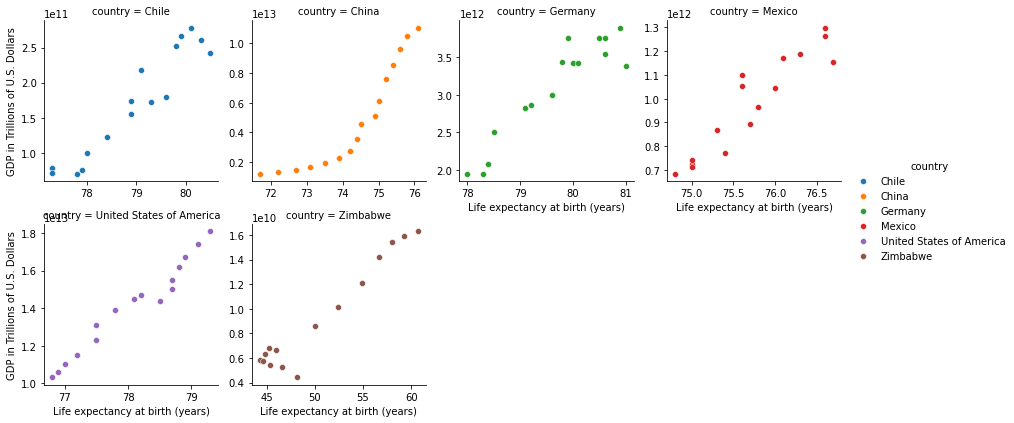

In [23]:
g = sns.FacetGrid(df, col='country', col_wrap=4,
                      hue = 'country', sharey = False, sharex = False)
g = (g.map(sns.scatterplot,'life_expectancy', 'gdp')
         .add_legend()
         .set_axis_labels('Life expectancy at birth (years)', 'GDP in Trillions of U.S. Dollars'));


## 4.3 Pearson correlation coefficient to measure the linear correlation between GDP and life expectancy

In [114]:
from scipy.stats import pearsonr

corr_gdp_life_expectancy, p = pearsonr(df.gdp, df.life_expectancy)
corr_gdp_life_expectancy #indicates a linear association as it is above 0.3

0.343206748449156

**The GDP is not having such a strong linear association with life expectancy as it would seem from the charts, looking at Zimbabwe this makes more sense as it has not such a significant growth in GDP but it has in life expectancy.**


# 5. Conclusions

**After the examination of our data we can derive the following observations:**

- Between the given time period (2000 - 2015) the life expectancy has been growing in all 6 nations, with Zimbabwe falling behind the furthest but also showing the most significant growth.
- In the given time period (2000 - 2015) the GDP has also been increasing in all 6 nations, with all showing occasional dips. The country with the highest GDP is the USA and the country with the lowest is Zimbabwe. The bar plot has revealed that China had a significant range of growth, the highest in the group.
- Germany has the highest life expectancy and Zimbabwe has the lowest.
- There is a linear correlation between GDP and life expectancy. However, based on the calculated pearson correlation coefficient it is not as strong as it would be indicated by the scatter plots alone. 